In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

## Analysis of Latent Space

In [2]:
prediction = pd.read_csv("../../visualisation/files/prediction/multi_task_phm.csv", sep=";")
latent_space = prediction.loc[:,"latent_space_0":"latent_space_4"]

In [3]:
latent_space.head()

,latent_space_0,latent_space_1,latent_space_2,latent_space_3,latent_space_4
0,-0.139532,0.234594,-0.355009,-0.211405,0.183166
1,-0.139399,0.234261,-0.355335,-0.211096,0.183003
2,-0.139251,0.234176,-0.355720,-0.210885,0.182985
3,-0.139286,0.234383,-0.355516,-0.211001,0.183078
4,-0.139224,0.234322,-0.355626,-0.210929,0.183071


In [4]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', "principal component 4"] )
status = prediction.loc[:,"status"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,status
0,0.028113,-0.394485,0.169186,-0.162639,0.0
1,0.027563,-0.394281,0.169074,-0.162625,0.0
2,0.027124,-0.394212,0.169179,-0.162738,0.0
3,0.027431,-0.394265,0.169276,-0.162735,0.0
4,0.027287,-0.394218,0.169280,-0.162776,0.0


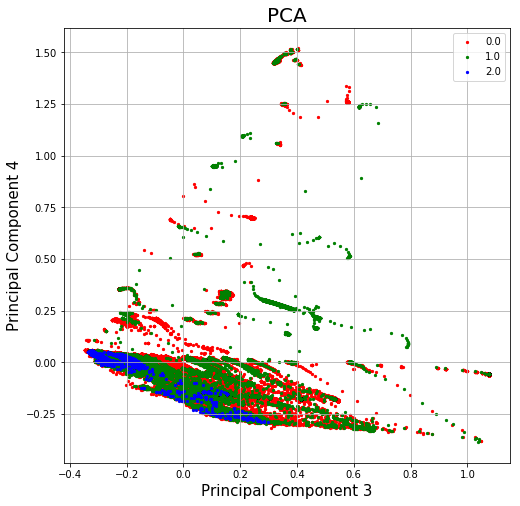

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

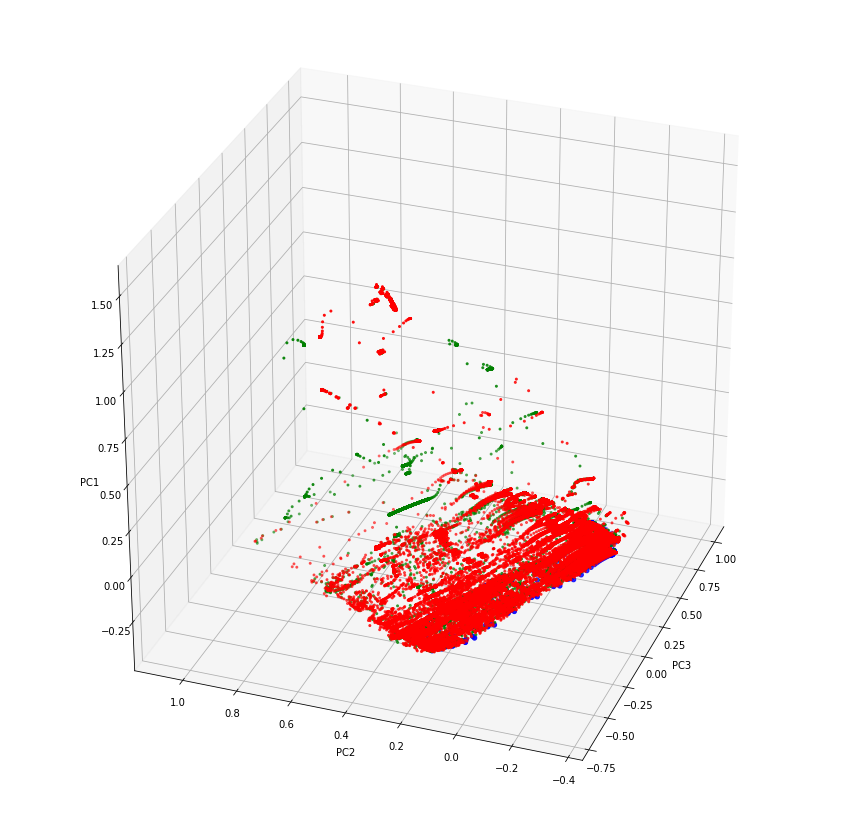

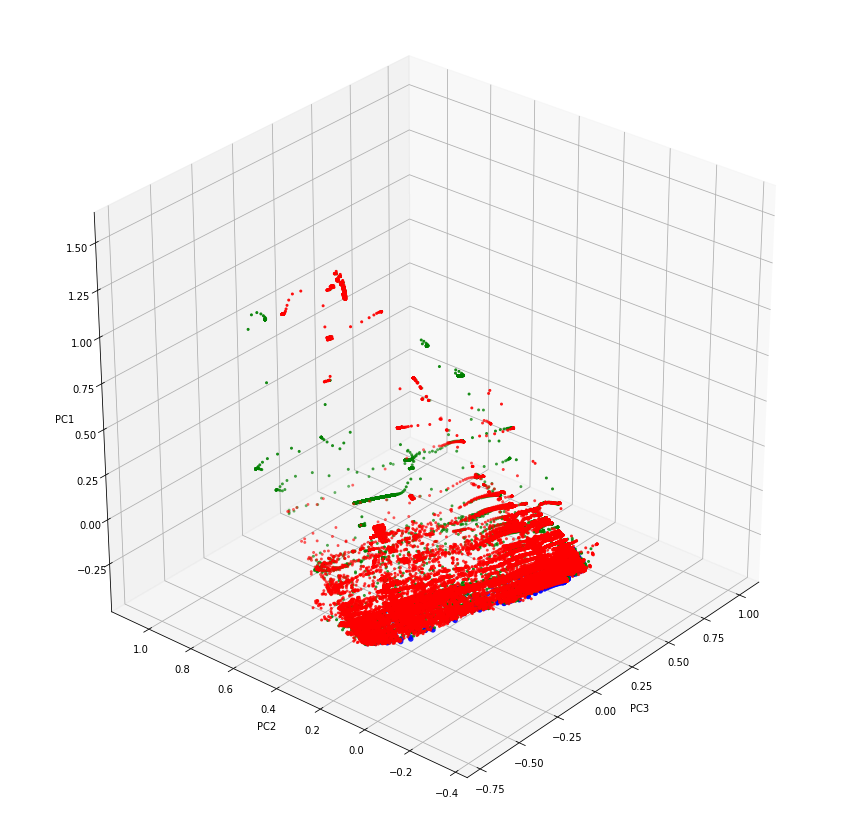

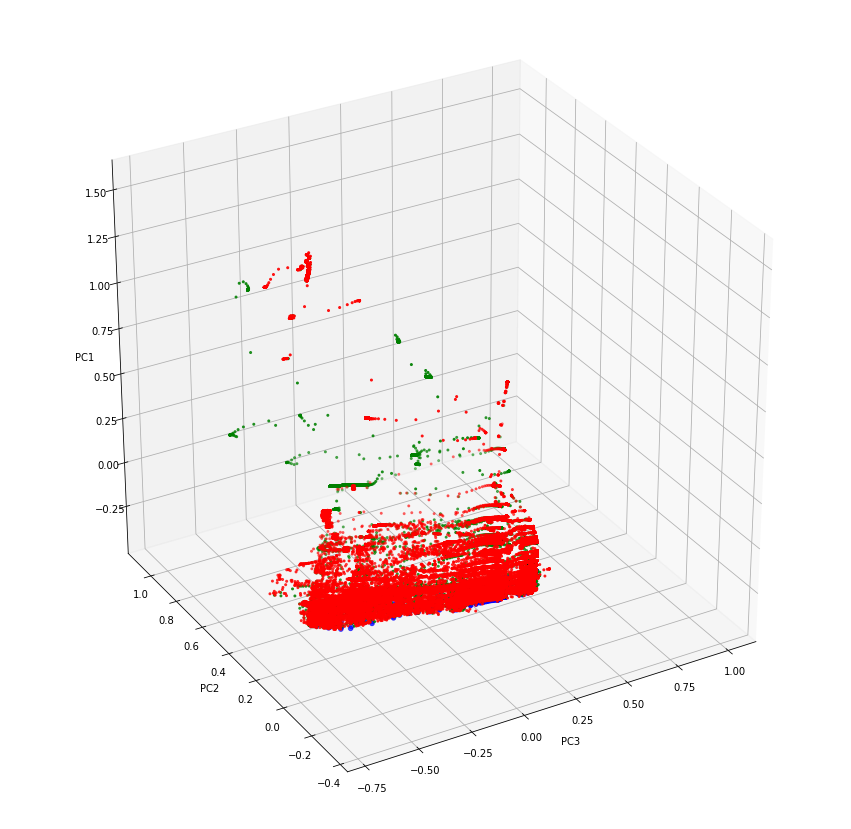

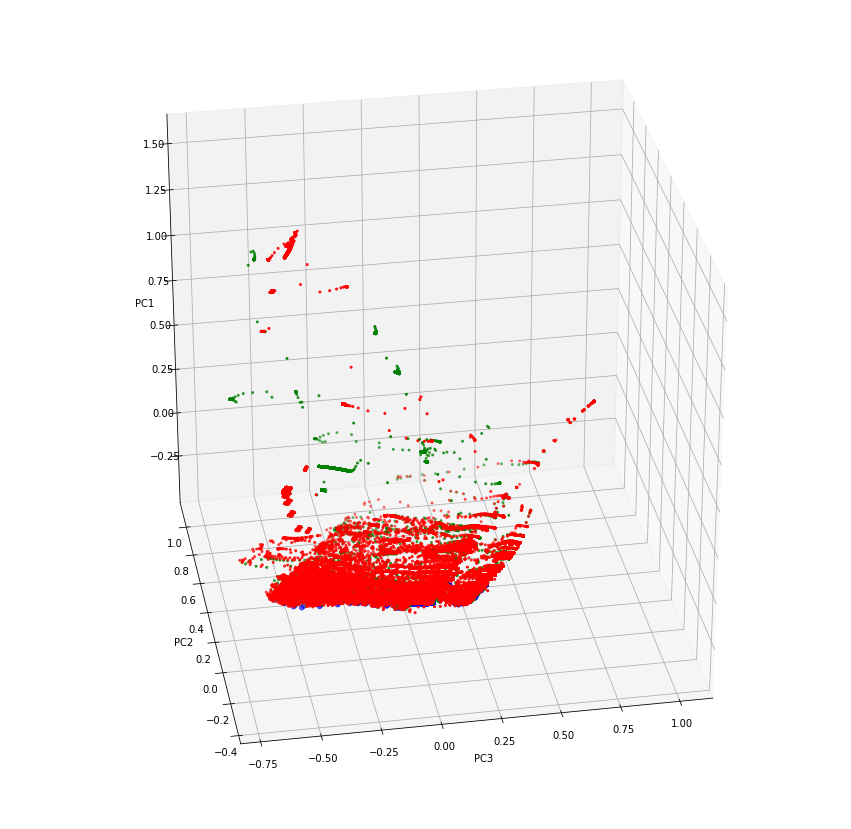

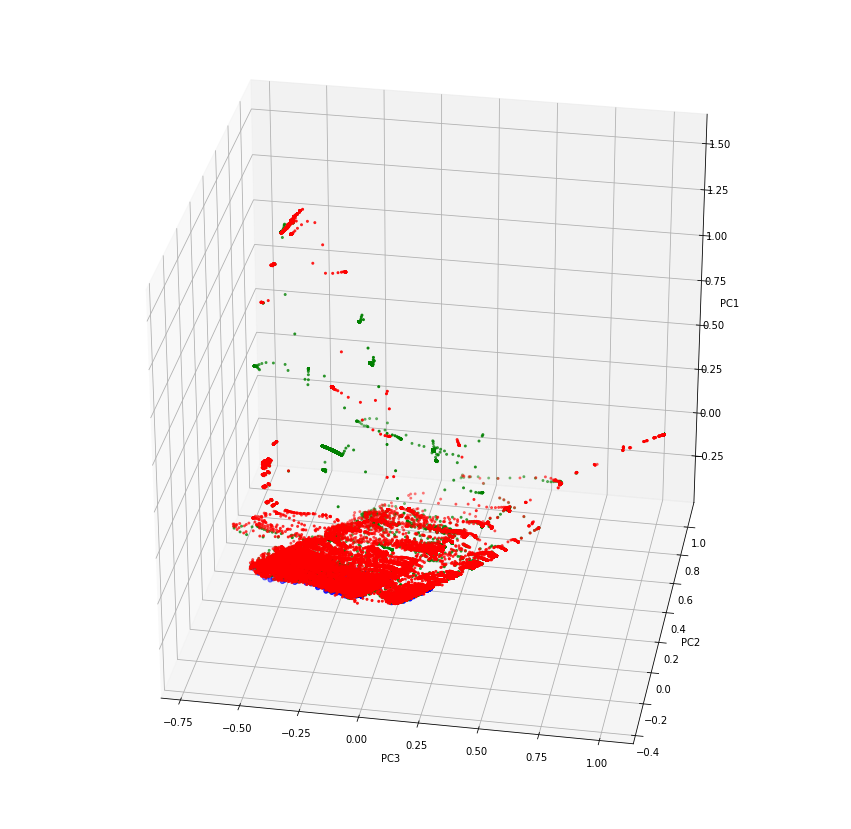

In [8]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0.0, 1.0, 2.0]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['status'] == target
        if target == 2.0:
            size = 20
        else:
            size = 4
        xs = finalDf.loc[indicesToKeep, 'principal component 2']
        ys = finalDf.loc[indicesToKeep, 'principal component 3']
        zs = finalDf.loc[indicesToKeep, 'principal component 4']
        ax.scatter(xs, ys, zs, c = color, s = size)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC3')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC1')
    plt.show()


In [6]:
dbscan_data = principalDf.iloc[:,[2,3]]
dbscan_data.head()

,principal component 3,principal component 4
0,0.169186,-0.162639
1,0.169074,-0.162625
2,0.169179,-0.162738
3,0.169276,-0.162735
4,0.169280,-0.162776


In [ ]:
db = DBSCAN(eps=0.6, min_samples=10).fit(dbscan_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

result = finalDf
result["label_cluster"] = labels

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [42]:
print(db.core_sample_indices_)

[    0     1     2 ... 12397 12398 12399]


In [43]:
print(db.components_)

[[ 0.08997927 -0.18310312]
 [ 0.09052953 -0.18297338]
 [ 0.09096987 -0.18284338]
 ...
 [-0.83552538  1.43551252]
 [-0.83549607  1.4355051 ]
 [-0.83551312  1.43549931]]


In [39]:
result.head()

,principal component 1,principal component 2,status,label_cluster
0,0.089979,-0.183103,0.0,0
1,0.090530,-0.182973,0.0,0
2,0.090970,-0.182843,0.0,0
3,0.090661,-0.182851,0.0,0
4,0.090807,-0.182803,0.0,0
